In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [132]:
df = pd.read_csv('Telco-Customer-Churn.csv')

#### What is Churn?

  - Customer Churn is defined as when customers discontinue doing business with a firm and choose some other better product.

  - The dataset comes from a telecommunication company and the dataset contains information about their customers - Whether those customers have stayed with the company or left the company ("Churned").


  The dataset contains the following information:

  1. Customer Information:
    - Customer ID.
    - Gender.
    - Senior Citizen => Boolean.
    - Partner => Boolean.
    - Dependents => Boolean.


  2. Service Information:
    - tenure => No of months they are doing business with the firm.
    - Phone Service => Boolean.
    - Multiple Lines =>
    - Internet Service => Which internet Service
    - Online security =>
    - Online Backup
    - Device Protection.
    - Techsupport => Boolean.
    - Streaming TV => Boolean.
    - Streaming Movies => Boolean
    - Contract => Month to Month, Year etc.
    - Paperless billing => Boolean.

  3. Account information:
    - Payment Method => Electronic Check, Mailed Check, Bank Transfer.
    - Monthly Charges =>
    - Total charges =>

  4. Target Variable:
    - Churn => Boolean.





#### Getting to know about the data

  **Summary:**

  - The dataset has 7000 rows and 21 columns.
  - There are three numeric columns => Tenure, MonthlyCharges, Senior Citizen.
  - But, Total Charges should also be a part of numeric data => Investigate.
  - No Null values in the data.
  - There are no duplicates.

In [133]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [134]:
df.shape

(7043, 21)

In [135]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [137]:
df.duplicated().sum()

np.int64(0)

###### bringing all the column names into a same format

In [138]:
df.columns = [column.capitalize() for column in df.columns]

#### Univariate Analysis

##### 1. CustomerID

  - Seems like a useless column => All values are unique => So no patterns can be observed with the help of this column.

In [139]:
df['Customerid'].nunique()

7043

In [140]:
df = df.drop(columns = 'Customerid')

##### 2. Gender

  - The gender is equally distributed between Male and Female.

In [141]:
gender_counts = df['Gender'].value_counts().reset_index()

gender_counts.columns = ['Gender', 'Count']

px.bar(gender_counts, x = 'Gender', y = 'Count', color = 'Gender', title = 'Distribution of Genders')


##### 3. SeniorCitizen

  - The column is numeric => So change it to object type.
  - There are only 15% of senior citizens.

In [142]:
seniorcitizen_counts = df['Seniorcitizen'].value_counts().reset_index()

seniorcitizen_counts.columns = ['Isseniorcitizen', 'Count']

seniorcitizen_counts['Percentage'] = round(seniorcitizen_counts['Count'] / len(df), 2)


def customText(row):
  return f"Total : {row['Count']}, Percentage : {row['Percentage']}%"

seniorcitizen_counts['text'] = seniorcitizen_counts.apply(customText, axis = 1)


fig = px.bar(seniorcitizen_counts, x = 'Isseniorcitizen', y = 'Count', color = 'Isseniorcitizen', text = 'text')

fig.update_traces(textposition='outside')
fig.show()

#### 4. Partner

  - Around 52% of people doesn't have partner, and 48% of people have partner.

In [143]:
def generateDataFrameForPlotting(tempDf, column, newColumnNames):
  newDf = tempDf[column].value_counts().reset_index()

  newDf.columns = [newColumnNames[0], newColumnNames[1]]

  newDf[newColumnNames[2]] = round(newDf['Count'] / len(df), 2)


  def customText(row):
    return f"Total : {row['Count']}"

  newDf[newColumnNames[3]] = newDf.apply(customText, axis = 1)

  return newDf


In [144]:
partnerDF = generateDataFrameForPlotting(df, 'Partner', ['Partner', 'Count', 'Percentage', 'Text'])

fig = px.bar(partnerDF, x = 'Partner', y = 'Count', color = 'Partner', text = 'Text')

fig.update_traces(textposition = 'outside')

fig.show()

#### 5. Dependents

  - Around 70% of customers doesn't have dependents, and only 30% of customers have dependents.

In [145]:
dependentsDF = generateDataFrameForPlotting(df, 'Dependents', ['Dependents', 'Count', 'Percentage', 'Text'])

fig = px.bar(dependentsDF, x = 'Dependents', y = 'Count', color = 'Dependents', text = 'Text')

fig.update_traces(textposition = 'outside')

fig.show()

##### 6. Phoneservice

  - Around 90% of the customers have phone service and only 10% of the people doesn't have phone service.

In [146]:
phoneserviceDF = generateDataFrameForPlotting(df, 'Phoneservice', ['Phoneservice', 'Count', 'Percentage', 'Text'])

fig = px.bar(phoneserviceDF, x = 'Phoneservice', y = 'Count', color = 'Phoneservice', text = 'Text')

fig.update_traces(textposition = 'outside')

fig.show()

##### 7. MultipleLines

  *   No phone service:
  The customer does not have any phone service at all (so they cannot have multiple lines either).

  * No:
  The customer has phone service but does not have multiple lines (they have only one line).

  * Yes:
  The customer has phone service and does have multiple lines (more than one line on the account).


- 10% of people doesn't have phone service.
- 48% of the people doesn't have multiple lines.
- 42 % of people have multiple lines.

In [147]:
multiplelinesDF = generateDataFrameForPlotting(df, 'Multiplelines', ['Multiplelines', 'Count', 'Percentage', 'Text'])

fig = px.bar(multiplelinesDF, x = 'Multiplelines', y = 'Count', color = 'Multiplelines', text = 'Text')

fig.update_traces(textposition = 'outside')

fig.show()

#### 8. Internetservice

  - 22% of people have no internet service.
  - 78% of people have internet service => Out of which :
    - 44% of people use Fiber optinc.
    - 34% of people use DSL.

In [148]:
internetserviceDF = generateDataFrameForPlotting(df, 'Internetservice', ['Internetservice', 'Count', 'Percentage', 'Text'])

fig = px.bar(internetserviceDF, x = 'Internetservice', y = 'Count', color = 'Internetservice', text = 'Text')

fig.update_traces(textposition = 'outside')

fig.show()

#### 9. OnlineSecurity

  - It is a additional feature which is provided with the internet connection.
  - Online security services such as antivirus software, Malware protection, firewalls etc.

  - 22% of customers doesn't even have internet service.
  - 78% does have internet service.
    - 50% doesn't opt for online security.
    - 28% did opt for online security.

In [149]:
onlinesecurityDF = generateDataFrameForPlotting(df, 'Onlinesecurity', ['Onlinesecurity', 'Count', 'Percentage', 'Text'])

fig = px.bar(onlinesecurityDF, x = 'Onlinesecurity', y = 'Count', color = 'Onlinesecurity', text = 'Text')

fig.update_traces(textposition = 'outside')

fig.show()

#### 10. OnlineBackup

  - Shows whether the customer has subscribed to an online backup service (like cloud backup, data storage) offered as an add on.


  - 22% of customers doesn't even have internet service.

  - 78% does have internet service.

      - 44% doesn't opt for online backup.
      - 34% did opt for online backup.

In [150]:
onlinebackupDF = generateDataFrameForPlotting(df, 'Onlinebackup', ['Onlinebackup', 'Count', 'Percentage', 'Text'])

fig = px.bar(onlinebackupDF, x = 'Onlinebackup', y = 'Count', color = 'Onlinebackup', text = 'Text')

fig.update_traces(textposition = 'outside')

fig.show()

#### 11. DeviceProtection

  - The equipment provided by the telco for home internet service (most commonly the Wi-Fi router or modem), and sometimes it can also include any other devices that are part of the service package (like a set-top box or internet gateway).


  - 22% of customers doesn't even have internet service.

  - 78% does have internet service.

      - 44% doesn't opt for online backup.
      - 34% did opt for online backup.

In [151]:
deviceprotectionDF = generateDataFrameForPlotting(df, 'Deviceprotection', ['Deviceprotection', 'Count', 'Percentage', 'Text'])

fig = px.bar(deviceprotectionDF, x = 'Deviceprotection', y = 'Count', color = 'Deviceprotection', text = 'Text')

fig.update_traces(textposition = 'outside')

fig.show()

#### 12. TechSupport


  - 22% of customers doesn't even have internet service.

  - 78% does have internet service.

      - 49% doesn't opt for online backup.
      - 29% did opt for online backup.

In [152]:
techsupportDF = generateDataFrameForPlotting(df, 'Techsupport', ['Techsupport', 'Count', 'Percentage', 'Text'])

fig = px.bar(techsupportDF, x = 'Techsupport', y = 'Count', color = 'Techsupport', text = 'Text')

fig.update_traces(textposition = 'outside')

fig.show()

#### 13. StreamingTV

  Whether the customer subscribed to streaming normal TV.


  - 22% of customers doesn't even have internet service.

  - 78% does have internet service.

      - 40% doesn't opt for online backup.
      - 38% did opt for online backup.

In [153]:
streamingtvDF = generateDataFrameForPlotting(df, 'Streamingtv', ['Streamingtv', 'Count', 'Percentage', 'Text'])

fig = px.bar(streamingtvDF, x = 'Streamingtv', y = 'Count', color = 'Streamingtv', text = 'Text')

fig.update_traces(textposition = 'outside')

fig.show()

#### 14. StreamingMovies

  Whether the customer subscribed to streaming services such as Netflix, Amazon Prime etc.


  - 22% of customers doesn't even have internet service.

  - 78% does have internet service.

      - 40% doesn't opt for online backup.
      - 39% did opt for online backup.

In [154]:
streamingmoviesDF = generateDataFrameForPlotting(df, 'Streamingmovies', ['Streamingmovies', 'Count', 'Percentage', 'Text'])

fig = px.bar(streamingmoviesDF, x = 'Streamingmovies', y = 'Count', color = 'Streamingmovies', text = 'Text')

fig.update_traces(textposition = 'outside')

fig.show()

#### 15. Contract

In [155]:
from plotly.subplots import make_subplots


subplots = make_subplots( specs=[[{"type": "xy"}, {"type": "domain"}]], rows = 1, cols = 2, subplot_titles = ['Number of Customers by Contract Type', 'Proportion of Customers by Contract Type'])


contractDF = generateDataFrameForPlotting(df, 'Contract', ['Contract', 'Count', 'Percentage', 'Text'])

fig1 = px.bar(contractDF, x = 'Contract', y = 'Count', color = 'Contract', text = 'Text')
fig2 = px.pie(contractDF, names = 'Contract', values = 'Count')

for trace in fig1.data:
  subplots.add_trace(trace, row = 1, col = 1)

for trace in fig2.data:
  subplots.add_trace(trace, row = 1, col = 2)


subplots.update_traces(width = 0.9, showlegend = False,  selector=dict(type = 'bar'))
subplots.update_layout(title_text = "Customer Contract")
subplots.show()

#### 17. Paperless Billing

  - Around 59% of customers chose paperless billing.
  - Around 41% of customers cose paper billing.

In [156]:
# subplots = make_subplots( specs=[[{"type": "xy"}, {"type": "domain"}]], rows = 1, cols = 2, subplot_titles = ['Number of Customers by Contract Type', 'Proportion of Customers by Contract Type'])

subplots = make_subplots(specs = [[{'type' : 'xy'}, {'type': 'domain'}]], rows = 1, cols = 2, subplot_titles= ["Number of Customers by Paperless Billing", "Proportion of Customers by Paperless Billing"])

paperlessbillingDF = generateDataFrameForPlotting(df, 'Paperlessbilling', ['Paperlessbilling', 'Count', 'Percentage', 'Text'])

fig1 = px.bar(paperlessbillingDF, x = 'Paperlessbilling', y = 'Count', text = 'Text')
fig2 = px.pie(paperlessbillingDF, names = 'Paperlessbilling', values = 'Count')

fig1.update_traces(textposition = 'outside')

for trace in fig1.data:
  subplots.add_trace(trace, row = 1, col = 1)

for trace in fig2.data:
  subplots.add_trace(trace, row = 1, col = 2)


subplots.show()



#### 17. PaymentMethod

  - Around 30% of customers prefer Electronic Check.
  - And all the other categories have 20% of customers.

In [157]:

subplots = make_subplots(specs = [[{'type' : 'xy'}, {'type': 'domain'}]], rows = 1, cols = 2, subplot_titles= ["Number of Customers by Payment Method", "Proportion of Customers by Payment Method"])

paymentmethodDF = generateDataFrameForPlotting(df, 'Paymentmethod', ['Paymentmethod', 'Count', 'Percentage', 'Text'])

fig1 = px.bar(paymentmethodDF, x = 'Paymentmethod', y = 'Count', text = 'Text')
fig2 = px.pie(paymentmethodDF, names = 'Paymentmethod', values = 'Count')

fig1.update_traces(textposition = 'outside')

for trace in fig1.data:
  subplots.add_trace(trace, row = 1, col = 1)

for trace in fig2.data:
  subplots.add_trace(trace, row = 1, col = 2)


subplots.show()



#### 18. Monthly Charges

  - Most of the people pay 20 dollars per month.

  Summary:
    - The data is right skewed.

In [158]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=['Distribution of Monthly Charges', 'Box Plot of Monthly Charges'])

fig1 = px.histogram(df, x = 'Monthlycharges')
fig2 = px.box(df, x = 'Monthlycharges')

for trace in fig1.data:
  fig.add_trace(trace, row = 1, col = 1)

for trace in fig2.data:
  fig.add_trace(trace, row = 1, col = 2)

fig.update_layout(title = 'Total Charges Distribution')

fig.show()

#### 19. Total Charges

  - Convert the data type of total charges to numeric.
  - There are some rows with total charges as 0 => Which is Tenure is 0 => But they do have phone service and all the other services.
  - I believe these rows are erroeneous, so i'm planning to remove these rows.


  Summary of the data:

  - The data is clearly right skewed.
  - We need to reduce the skewness in order to get better results.

In [159]:
df[df['Totalcharges'] == ' ']

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [160]:
df = df[df['Totalcharges'] != ' ']

In [161]:
df.loc[:, 'Totalcharges'] = df['Totalcharges'].astype('float')

In [162]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=['Distribution of Total Charges', 'Box Plot of Total Charges'])

fig1 = px.histogram(df, x = 'Totalcharges')
fig2 = px.box(df, x = 'Totalcharges')

for trace in fig1.data:
  fig.add_trace(trace, row = 1, col = 1)

for trace in fig2.data:
  fig.add_trace(trace, row = 1, col = 2)

fig.update_layout(title = 'Total Charges Distribution')

fig.show()

#### 20. Tenure

  - Number of months the customer has stayed with the company

In [163]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=['Distribution of Tenure', 'Box Plot of Tenure'])

fig1 = px.histogram(df, x = 'Tenure', histnorm = 'density')
fig2 = px.box(df, x = 'Tenure')

for trace in fig1.data:
  fig.add_trace(trace, row = 1, col = 1)

for trace in fig2.data:
  fig.add_trace(trace, row = 1, col = 2)

fig.update_layout(title = 'Tenure Distribution')

fig.show()

#### 21. Churn

  - The dataset is clearly imbalanced.
  - The people who stay are 3 times more than people who churn.

In [164]:

subplots = make_subplots(specs = [[{'type' : 'xy'}, {'type': 'domain'}]], rows = 1, cols = 2, subplot_titles= ["Number of Customers by Churn", "Proportion of Customers by Churn"])

churnDF = generateDataFrameForPlotting(df, 'Churn', ['Churn', 'Count', 'Percentage', 'Text'])

fig1 = px.bar(churnDF, x = 'Churn', y = 'Count', text = 'Text')
fig2 = px.pie(churnDF, names = 'Churn', values = 'Count')

fig1.update_traces(textposition = 'outside')

for trace in fig1.data:
  subplots.add_trace(trace, row = 1, col = 1)

for trace in fig2.data:
  subplots.add_trace(trace, row = 1, col = 2)


subplots.show()



### BiVariate Analysis With the output column

In [165]:
categorical_columns = list(df.select_dtypes(include = 'object').columns)
categorical_columns.remove('Churn')

numerical_columns = list(df.select_dtypes(include = ['float', 'int']).columns)

##### Bivariate Analysis with Numeric Columns.

  Summary:

  Primary Finding: The customers who churned have substantially higher monthly charges compared to those who didn't churn. This suggests price is huge factor in customer retention.


  Distribution:
    - The Non Churned customers have a median of 65$ Per month.
    - The churned customers have a median of 80$ per month.


  Violin Plot:
    - There is a clear spike in churn when the price is above 60$ per month. These customers have a high chance of churning.
    - Further analysis needed for customers who churned even at lower prices.

  Business implications:
    - As price goes up, probability of churn goes up.
    
  What business can do:

  1. Customer Segmentation:
    - Divide customers into segments based on the monthly charges.
    - **High value, High risk customers (80$+)**
      - Provide premium customer support.
      - Provide additional perks such as early access to new features etc.

    - **Medium value, stable customers (40$-80$)**
      - Provide stable support.
      - Offer upgrade incentives.

    - **Low value, Loyal customers (<40$)**
      - Focus on automated service.
      - Occational promotional offers.
    
  2. Value proposition:

    - The reason why a customer should choose your product and feel good about paying for it is essentially "What's in it for them".

   - The problem from our data: Customers paying higher monthly charges are leaving, which suggests they don't feel they're getting enough value for their money.

   How to strengthen value proposition:

    - **Add more benefits:** Free shipping, early access to premium features, prority support.
    - **Improve service quality**: Faster response rate, better user experience.
    - **Communicate existing value better.**

  Ex:
  - **Bad value proposition:** 100\$ per month for internet service.
  - **Good value proposition:** 100\$ per month for internet service + Early access to new features + 24/7 Premium customer service + Free equipment upgrades.


  - **How to retain the customers:**
    1. Identify: Identify the customers who are paying higher monthly charges.
    2. Segment : Segment them as high risk premium customers.
    3. Strengthen value proposition: provide additional benefits.
  

In [166]:

fig = make_subplots(rows = 3, cols = 2, specs=[
        [{"type": "xy"}, {"type" : "xy"}],
        [{"type": "xy"}, {"type": "xy"}],
        [{"type" : "xy", "colspan" : 2}, None ]
        ],
        subplot_titles=['Bar Plot', 'Box Plot', 'Violin Plot', 'Strip Plot', 'KDE plot'],
        row_heights = [0.3, 0.3, 0.4]
                    )


monthlychargesDF = df.groupby('Churn')['Monthlycharges'].mean().reset_index()

fig1 = px.bar(monthlychargesDF, x = 'Churn', y = 'Monthlycharges', color = 'Churn')
fig2 = px.box(df, x = 'Churn', y = 'Monthlycharges', color = 'Churn')
fig3 = px.violin(df, x = 'Churn', y = 'Monthlycharges', box = True, color = 'Churn')
fig4 = px.strip(df, x = 'Churn', y = 'Monthlycharges', color = 'Churn', stripmode = 'overlay')
fig5 = px.histogram(df, x="Monthlycharges", color="Churn", barmode="overlay", histnorm="density", opacity=0.5)


for trace in fig1.data:
  fig.add_trace(trace, row = 1, col = 1)

for trace in fig2.data:
  fig.add_trace(trace, row = 1, col = 2)

for trace in fig3.data:
  fig.add_trace(trace, row = 2, col = 1)

for trace in fig4.data:
  fig.add_trace(trace, row = 2, col = 2)

for trace in fig5.data:
  fig.add_trace(trace, row = 3, col = 1)

fig.update_layout(height = 1000, title = 'Monthly Charges vs Churn')
fig.update_traces(showlegend = False ,selector = {'type' : 'bar'})
fig.update_traces(showlegend = False ,selector = {'type' : 'box'})
fig.update_traces(showlegend = False ,selector = {'type' : 'violin'})
fig.show()

#### 2. Total Charges

  It represents their cumulative spending throughout their lifetime with the company.

  - Customers who stay longer provide much higher revenue - Focus on keeping the customers.

  Bar plot:
  - The customers who stay generate a revenue twice to the customers who churn.
  - Non churned customer usually generate a revenue of 2500 dollars for the company where as the churned customers generate 1500 dollars.

  Box plot:
  - The outliers are the customers who generated a lot of revenue for the company and then they churned, Need additional analysis for these customers.
  
  Violin plot:
  - The churned customers cluster around the lower total charges, it means the customers are leaving early in their relationship with the company before accumulating significant total charges.
  - The customers whose total spending is less than 1000$ have a higher probability to churn => These are the early customers.



**- Business implications:**

  1. **Early churn risk:** Most customers who churn do so before reaching higher total spending. Most customers leave during the early stages of their customer journey.

  2. **Tenure matters:** Once the customer reaches a certain tenure, their probability of churn decreases rapidly. They are more likely to stick with the company.

  3. **Onboarding matters:** Since customers churn during early stages, having a healthy relationship with the customers during the first few months/years is crucial for retention.


Recommendations:

  1. Focus on early retention.
  2. Reward loyalty.
  

Survival Bias: The customers who stick around long enough to accumulate higher total charges are naturally more likely to continue staying.




In [167]:

fig = make_subplots(rows = 3, cols = 2, specs=[
        [{"type": "xy"}, {"type" : "xy"}],
        [{"type": "xy"}, {"type": "xy"}],
        [{"type" : "xy", "colspan" : 2}, None ]
        ],
        subplot_titles=['Bar Plot', 'Box Plot', 'Violin Plot', 'Strip Plot', 'KDE plot'],
        row_heights = [0.3, 0.3, 0.4]
                    )


totalchargesDF = df.groupby('Churn')['Totalcharges'].mean().reset_index()

fig1 = px.bar(totalchargesDF, x = 'Churn', y = 'Totalcharges', color = 'Churn')
fig2 = px.box(df, x = 'Churn', y = 'Totalcharges', color = 'Churn')
fig3 = px.violin(df, x = 'Churn', y = 'Totalcharges', box = True, color = 'Churn')
fig4 = px.strip(df, x = 'Churn', y = 'Totalcharges', color = 'Churn', stripmode = 'overlay')
fig5 = px.histogram(df, x="Totalcharges", color="Churn", barmode="overlay", opacity=0.5)


for trace in fig1.data:
  fig.add_trace(trace, row = 1, col = 1)

for trace in fig2.data:
  fig.add_trace(trace, row = 1, col = 2)

for trace in fig3.data:
  fig.add_trace(trace, row = 2, col = 1)

for trace in fig4.data:
  fig.add_trace(trace, row = 2, col = 2)

for trace in fig5.data:
  fig.add_trace(trace, row = 3, col = 1)

fig.update_layout(height = 1000, title = 'Total Charges vs Churn')
fig.update_traces(showlegend = False ,selector = {'type' : 'bar'})
fig.update_traces(showlegend = False ,selector = {'type' : 'box'})
fig.update_traces(showlegend = False ,selector = {'type' : 'violin'})
fig.show()

#### 3. Tenure vs Churn

  1. Bar plot:
    - The average tenure of the customers who churn is very less compared to the average tenure of customers who won't.
    - It means, customers who leave the company generally do so early - Most churn happens among the new customers.


  2. Box Plot:
    - The customers who didn't churn tend to stay longer and have much varied tenure.
    - Long term relationships are associated with customer retention, customers who stay longer are less likely to churn.
    - The customers who churn tend to churn during the first month to 29 months.
    - There are some outlier customers who stayed for a long time with the company, but churned.


  3. Violin Plot:
    - Churned Customers cluster at lower tenure.
    - A lot of customers are being lost during the first year and even in the first few months.

  4. Histogram:
    - If we only observe the tenure of churns, There is a clear trend going down, as the number of months increasing, the churn rate is decreasing.


Business Insights:

  - Retention Focus : If we could retian customers during the first few months and atleast a year => The customer is going to stick with the company longer.
  - Loyalty: The customers who make it past their first year are much less likely to churn.
  - Outlier Analysis: Analyze the long term churns, they generally should not leave, but they left, so there are some other reasons for them to leave.


Technical Insights:

  - As the Tenure increases => Churn Decreases.


In [168]:

fig = make_subplots(rows = 3, cols = 2, specs=[
        [{"type": "xy"}, {"type" : "xy"}],
        [{"type": "xy"}, {"type": "xy"}],
        [{"type" : "xy", "colspan" : 2}, None ]
        ],
        subplot_titles=['Bar Plot', 'Box Plot', 'Violin Plot', 'Strip Plot', 'KDE plot'],
        row_heights = [0.3, 0.3, 0.4]
                    )


totalchargesDF = df.groupby('Churn')['Tenure'].mean().reset_index()

fig1 = px.bar(totalchargesDF, x = 'Churn', y = 'Tenure', color = 'Churn')
fig2 = px.box(df, x = 'Churn', y = 'Tenure', color = 'Churn')
fig3 = px.violin(df, x = 'Churn', y = 'Tenure', box = True, color = 'Churn')
fig4 = px.strip(df, x = 'Churn', y = 'Tenure', color = 'Churn', stripmode = 'overlay')
fig5 = px.histogram(df, x="Tenure", color="Churn", barmode="overlay", opacity=0.5)


for trace in fig1.data:
  fig.add_trace(trace, row = 1, col = 1)

for trace in fig2.data:
  fig.add_trace(trace, row = 1, col = 2)

for trace in fig3.data:
  fig.add_trace(trace, row = 2, col = 1)

for trace in fig4.data:
  fig.add_trace(trace, row = 2, col = 2)

for trace in fig5.data:
  fig.add_trace(trace, row = 3, col = 1)

fig.update_layout(height = 1000, title = 'Tenure vs Churn')
fig.update_traces(showlegend = False ,selector = {'type' : 'bar'})
fig.update_traces(showlegend = False ,selector = {'type' : 'box'})
fig.update_traces(showlegend = False ,selector = {'type' : 'violin'})
fig.show()

#### Bivariate analysis with Categorical - Categorical Columns

##### 1. Gender vs Churn:

  - The distribution of churns across genders is evenly balanced.
  - Gender independence: The churn behavior is independent of gender.
  

##### Statistical test : To prove that there is no significant association between gender and churn.

In [169]:
from scipy.stats import chi2_contingency


def statistical_analysis(column, target):

  # Assumptions:
    # - The observations are independent of each other.
    # - Each cell in the observed values have atleast 5 values.

  null_hypothesis = f"No relationship"
  alternate_hypothesis = f"Related to Each other"

  observed_values = pd.crosstab(df[column], df[target]).values

  chi2, p, dof, expected = chi2_contingency(observed_values)

  if p < 0.05:
    return p, alternate_hypothesis
  else:
    return p, null_hypothesis

In [170]:
def plot_graph(column, target):
    churngenderDF = df.groupby([target, column]).size().reset_index(name='Count')
    totalValues = churngenderDF['Count'].sum()

    churngenderDF['Percentages'] = churngenderDF['Count']/totalValues


    p, output = statistical_analysis(column, target)

    fig = make_subplots(rows=1, cols=2,
                       subplot_titles=('Grouped Bar', 'Heatmap'))

    # First subplot: Grouped bar
    fig1 = px.bar(churngenderDF, x=column, y='Count', color=target, barmode='group')

    # Second subplot: Heatmap
    pivot_df = churngenderDF.pivot(index=column, columns=target, values='Count')
    fig2 = px.imshow(pivot_df, text_auto=True, color_continuous_scale='Blues')

    for trace in fig1.data:
        trace.showlegend = True
        fig.add_trace(trace, row=1, col=1)

    # Add heatmap trace
    for trace in fig2.data:
        trace.showlegend = False
        trace.colorbar = dict(x=1.02, len=0.5, y=0.25)
        fig.add_trace(trace, row=1, col=2)

    fig.update_xaxes(title_text=column, row=1, col=1)
    fig.update_yaxes(title_text="Count", row=1, col=1)

    fig.update_xaxes(title_text=target, row=1, col=2)
    fig.update_yaxes(title_text=column, row=1, col=2)

    fig.update_layout(
        title=f'{column} vs {target}<br>P value: {round(p, 2)} and {output}',
        legend=dict(x=0.45, y=1),
        margin=dict(r=150)
    )
    fig.show()

In [171]:
def bivariate_analysis(column, target):
  plot_graph(column, target)

In [172]:
categorical_columns

['Gender',
 'Partner',
 'Dependents',
 'Phoneservice',
 'Multiplelines',
 'Internetservice',
 'Onlinesecurity',
 'Onlinebackup',
 'Deviceprotection',
 'Techsupport',
 'Streamingtv',
 'Streamingmovies',
 'Contract',
 'Paperlessbilling',
 'Paymentmethod',
 'Totalcharges']

##### Gender vs Churn

  - The churn is not affected by the gender.
  - Both male and female churn and stay in the same way.

In [173]:
bivariate_analysis('Gender', 'Churn')

##### SeniorCitizen vs Churn:

  1. The senior citizen churn rate is higher than non senior citizen churn rate.
  2. One out of 4 non seniorcitizens are churning, where as one out of every 2 senior citizens churn.
  3. Churn rate of non seniorcitizen: 23%
  4. Churn rate of seniorcitizens : 42%.

  Further analysis needed why senior citizens are churning more.

In [174]:
bivariate_analysis('Seniorcitizen', 'Churn')

#### Partner vs Churn

  1. The customers without partner have the probability of churning more than customers with partners.
  2. If the customer doesn't have a partner, there is twice the probability of the customer churning than when he has a partner.


  3. Partnered Customers have an 80% retention rate and 20% of churn rate.
  4. Single Customers have an 67% retention rate and 33% of churn rate.


Strategic Insights:

  1. Acquisition focus: Focus on marketing to couples/families as they stay loyal.
  2. Retention focus: Develop special programs for single customers.




In [175]:
bivariate_analysis('Partner', 'Churn')

##### Dependents vs Churn

  - Customers with dependents are much less likely to churn (just 15%), and far more likely to stay (85% retention).

  - Customers without dependents have a much higher churn rate (31%), with a lower retention rate (69-70%).


  Strategic Insights:

  - Focus on marketing the service to familes as they stay longer.
  - Try to give incentives to the customers without dependents so that they will not churn.
  


In [176]:
bivariate_analysis('Dependents', 'Churn')

##### Phoneservice vs Churn

  - The p value suggests that there is not significant relationship between the Phone service and Customer churning.
  - Whether a customer has phone service or not does not influence whether they churn.


Business implication:

  - Having or not having a phone service doesn't impact churn => So focus on other variables.

In [177]:
bivariate_analysis('Phoneservice', 'Churn')

#### Multiplelines vs Churn

  - Customers with Multiple lines churn 28% and retain 72%.
  - Customers with Single line : churn 25% and retain 75%.
  - Customers with no line: Churn 25% and retain 75%.


  Business Insights:

  - Customers with multiple lines are slighly prone to churn.
  - Offer extra features or support to the customers with multiple lines.

  Further analysis required with other variables.

In [178]:
bivariate_analysis('Multiplelines', 'Churn')

##### Internetservice vs Churn

  - Customers with fiber optic cable:
    - Churn : 41%.
    - Retain : 59%.
    - Monthly Charges : $91 on average.

  - Customers with DSL cable:
    - Churn : 19%.
    - Retain : 81%.
    - Monthly Charges: $58 on average.

  - Customers with No internet service:
    - Churn: 7%.
    - Retain : 93%.
    - Monthly Charges: $21 on average.


  Business Insights:
  - The fiber optic cable is very expensive which is leading to the churn of many customers.
  - The DSL cable is also quite expensive but not as much as fiber optic.
  - The customers who are having internet service are more likely to churn due to th prices of the internet.


In [179]:
bivariate_analysis('Internetservice', 'Churn')

In [180]:
df.groupby(['Internetservice'])['Monthlycharges'].mean()

,Monthlycharges
Internetservice,
DSL,58.088017
Fiber optic,91.500129
No,21.076283


##### Onlinesecurity vs Churn

  - Customers who haven't opted for Online security:
    - churn: 42%.
    - Retain: 58%.
    - Monthly Charges: $75.

  - Customers who opted for online security:
    - Churn: 10%
    - Retain: 90%.
    - Monthly Charges: $78.

  - Customers with no internet service:
    - Churn : 8%.
    - Retain: 92%.
    - Monthly Charges: $21.


- Business Insights:

  - Revenue Impact analysis:
    - Customers paying $78(Without security) have 4x better retention than those paying $75(without security).
    - A lot of revenue is being lost due to the churning of customers without security. 75 * 1461 = $109,575/ Month


  - Product Strategy Insights:
    - Bundle Effectiveness: Making customers choose the online security leads to massive improvement in retention rate.
    


Immediate Business actions:

  - Target 2036 customers without internet security for security upgrade.
  - Make online security a default feature.

In [181]:
bivariate_analysis('Onlinesecurity', 'Churn')

In [182]:
df.groupby(['Onlinesecurity'])['Monthlycharges'].mean()

,Monthlycharges
Onlinesecurity,
No,75.693737
No internet service,21.076283
Yes,78.870496


##### Onlinebackup vs Churn

  - Customers who opted for online backup:
    - Churn : 21%.
    - Retain : 79%.
    - Monthly Charges: $81

  - Customers with no online backup:
    - Churn : 40%.
    - Retain: 60%.
    - Monthly Charges: $72.

  - Customer with no internet connection:
    - Churn: 8%.
    - Retain : 92%.
    - Monthly Charges: $21.


Business Insights:

  - The customers who are paying for the internet connection but doesn't have online backup are more likely to churn.
  - This could be because: They don't find the value for \$72, just for the internet.
  - The company should emphasize the importance of having a online backup and make the customers choose online backup => Which inturn reduces 20% of churn rate.
  - Show real world examples of the differences with and without backup for just $8.
  

  - Targeted promotions:
    - Discounts and trails: Offere the backup free for one month.
    - Limited time offer: Upgrade to online backup with just 5$ extra/month for the first 6 months.



  - Bundling:
    - Throw in small extras such as priority support if they upgrade.


  - Feature comparision:
    - Create a feature comparison between online backup and no online backup.
    - FOMO: Label the $80 as the best seller.




In [183]:
bivariate_analysis('Onlinebackup', 'Churn')

In [184]:
df.groupby('Onlinebackup')['Monthlycharges'].mean()

,Monthlycharges
Onlinebackup,
No,71.944282
No internet service,21.076283
Yes,83.106412


'Deviceprotection',
 'Techsupport',
 'Streamingtv',
 'Streamingmovies',
 'Contract',
 'Paperlessbilling',
 'Paymentmethod',
 'Totalcharges']

##### Deviceprotection vs Churn

  - The same situation as the previous one.
  - The people with intenet plan and no device protection are churning more.
  


  Business Insights:

    - Offer All the three Device protection, Online backup, Online security within one bundle.
    - This would reduce the churn by 50%.

In [185]:
bivariate_analysis("Deviceprotection", "Churn")

##### Techsupport vs Churn

  - Very similar situation.

In [186]:
bivariate_analysis("Techsupport", "Churn")

##### Streamingtv vs Churn

  - Streaming TV:
    - Churn: 30%.
    - Retain : 70%.
    - Monthly Charges: $88

  - No streaming TV:
    - Churn: 33%.
    - Retain: 67%.
    - Monthly Charges: $65.

  - No Internet:
    - Churn: 8%.
    - Retain: 92%.
    - Monthly Charges: $21.


Business Insights:

  - Streaming TV Usage and Churn:

    - Churn rates are quite similar for customers with or without streaming tv and customers without internet connection have a lot less churn.
    - So, streaming TV alone isn't a major differntiator for churn.
    - Interpretation:  So the internet connnection is the biggest driver of churn.

  - Revenue vs Risk:
    - Monthly charges for High value streaming TV customers is $88 and medium value non streaming tv customers is $65 and for those without intenet connection $21.
    - The high value customers have high risk of churning.

  - Churn Reduction Focus:
    - Identify the pain points of the customers who opted for the internet plan.



  

In [187]:
bivariate_analysis("Streamingtv", "Churn")

In [188]:
df.groupby('Streamingtv')['Monthlycharges'].mean()

,Monthlycharges
Streamingtv,
No,65.388928
No internet service,21.076283
Yes,88.770829


##### Streaming movies vs Churn:

  - It is very similar to the previous one.

In [189]:
bivariate_analysis("Streamingmovies", "Churn")

##### Contract vs churn:

  - Month to Month:
    - Churn: 43%.
    - Retain: 57%.
    - Monthly Charges: $66.

  - One year:
    - Churn: 11%
    - Retain: 89%.
    - Monthly Charges: $65.

  - Two years:
    - Churn: 2%
    - Retain: 98%.
    - Monthly Charges: $60.


  Business insights:

  - Contract vs Churn:
    - Contract makes sense => If the customer is in a contract, he won't like to break the contract.
    - The customers with month - month contract => are super prone to churn.
    - Churn reduces drastically when they choose one year or above contract.

  - Charges vs Contract:
    - The customer is actually paying less if he is on a yearly contract.
    - Many users may not realize the cost savings of yearly contracts. Use clear, simple messaging and visuals comparing the long-term value of each contract type.
  
  - Target segment for upgrades:
    - Month to month customers are primary target for upgrades.

  - Discounts or Offers:
    - Give discounts for customers so they will choose yearly contracts which reduces the rate of churn by 30%.
    
  - Additional Perks:
    - Offer additional perks for yearly contract customers like priority support, early access to features.

    

In [190]:
bivariate_analysis("Contract", "Churn")

In [191]:
df.groupby('Contract')['Monthlycharges'].mean()

,Monthlycharges
Contract,
Month-to-month,66.398490
One year,65.079416
Two year,60.872374


##### Paperless billing vs Churn:

  - Paperless:
    - Churn: 34%.
    - Retain: 66%.

  - Paper:
    - Churn: 16%.
    - Retain: 84%.


  Business insights:

  - Behavioural link:
    - Paper less billing is mostly used by younger generation and tech nerds.
    - Paper billing users might be older and more loyal.
    - So there may be other reasons for churning.


  - Even though there is a correlation between paper less billing and churn, further analysis is needed to check if there is causation.
  - Correlation != Causation.
  - May be other variables are playing a role in these results.


  - Strategies:

    - Don't discourage paperless billing as it is more environment friendly and saves money.
    - Closely monitor paperless customers and provide additional incentives.


In [192]:
bivariate_analysis("Paperlessbilling", "Churn")

##### Paymentmethod vs Churn:

  1. Mailed Check and Electronic Check Users Have Higher Churn
Electronic check:

Churns: 1071 out of 2365 (45%)

Mailed check:

Churns: 308 out of 1604 (19%)

Observation:

Electronic check users have the highest churn rate by a wide margin.

Mailed check churn is also higher than most, but not as severe as electronic checks.

2. Bank Transfer & Credit Card (Automatic) Users Are Most Loyal
Bank transfer (automatic):

Churns: 258 out of 1542 (17%)

Credit card (automatic):

Churns: 232 out of 1521 (15%)

Observation:

Automatic payment methods (bank transfer, credit card) are associated with the lowest churn rates.

These users are more likely to stay, perhaps due to set-and-forget convenience, less friction, or longer tenure.

3. Actionable Business Insights
Promote automatic payments:

Encourage customers to switch to automatic payments by highlighting convenience and possible discounts.

Targeted churn reduction:

Focus retention efforts on customers paying by electronic check or mailed check, since they’re at higher risk.

Convert manual to auto-pay:

Offer incentives (like a one-time bill credit or sweepstakes) for switching to automatic bank or credit card payments.

4. Hypotheses for Deeper Analysis
Why do electronic check users churn more?

Are they less engaged, more price sensitive, or facing technical/payment issues?

Are they newer customers, or do they overlap with segments already at higher risk?

Do mailed check users skew older?

Could be a more traditional, possibly less price-sensitive, but still moderately at-risk group.



In [193]:
bivariate_analysis("Paymentmethod", "Churn")

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7032 non-null   object 
 1   Seniorcitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   Tenure            7032 non-null   int64  
 5   Phoneservice      7032 non-null   object 
 6   Multiplelines     7032 non-null   object 
 7   Internetservice   7032 non-null   object 
 8   Onlinesecurity    7032 non-null   object 
 9   Onlinebackup      7032 non-null   object 
 10  Deviceprotection  7032 non-null   object 
 11  Techsupport       7032 non-null   object 
 12  Streamingtv       7032 non-null   object 
 13  Streamingmovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  Paperlessbilling  7032 non-null   object 
 16  Paymentmethod     7032 non-null   object 
 17  

#### Multivariate analysis.

In [195]:
df.columns

Index(['Gender', 'Seniorcitizen', 'Partner', 'Dependents', 'Tenure',
       'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity',
       'Onlinebackup', 'Deviceprotection', 'Techsupport', 'Streamingtv',
       'Streamingmovies', 'Contract', 'Paperlessbilling', 'Paymentmethod',
       'Monthlycharges', 'Totalcharges', 'Churn'],
      dtype='object')

#### Multicollinearity:

  - Seems like all the following features are highly correlated to each other.
  - This leads to either:
    1. Perfect Multicollinearity:
      - The determinant will be 0 due to which we cannot find the value of inverse.
      - If we don't find the inverse, we won't be having the weights.

    2. Imperfect multicollinearity:
      - The determinant will be very small.
      - This leads to high standard errors => The model can be anywhere between the standard errors.
      - This also leads to unstable estimates => A small change in input data leads to huge changes in the weights.

  - We can clearly see that people with or without security are churning higher.
  - All the following graphs are similar => All these variables are highly related with each other.

<Axes: xlabel='Multiplelines', ylabel='Monthlycharges'>

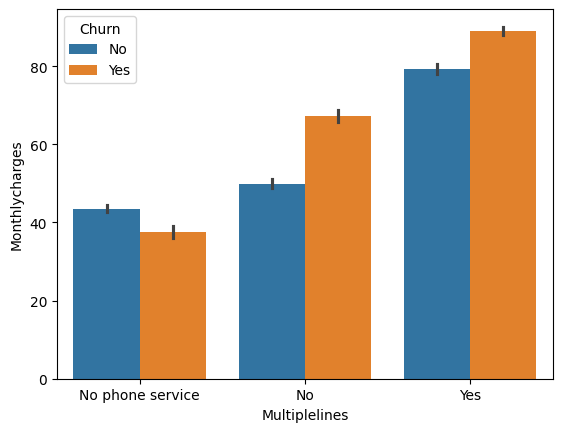

In [196]:
sns.barplot(data = df, x = 'Multiplelines', y = 'Monthlycharges', hue = 'Churn')

<Axes: xlabel='Onlinesecurity', ylabel='Monthlycharges'>

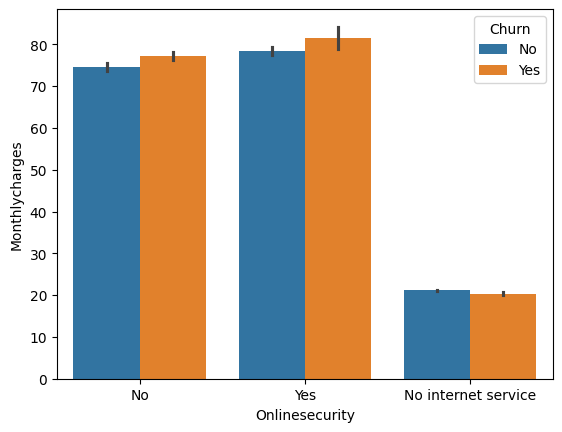

In [197]:
sns.barplot(data = df, x = 'Onlinesecurity', y = 'Monthlycharges', hue = 'Churn')

<Axes: xlabel='Techsupport', ylabel='Monthlycharges'>

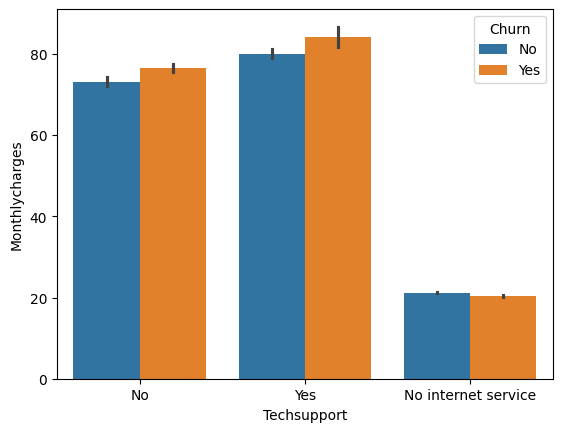

In [198]:
sns.barplot(data = df, x = 'Techsupport', y = 'Monthlycharges', hue = 'Churn')

<Axes: xlabel='Streamingtv', ylabel='Monthlycharges'>

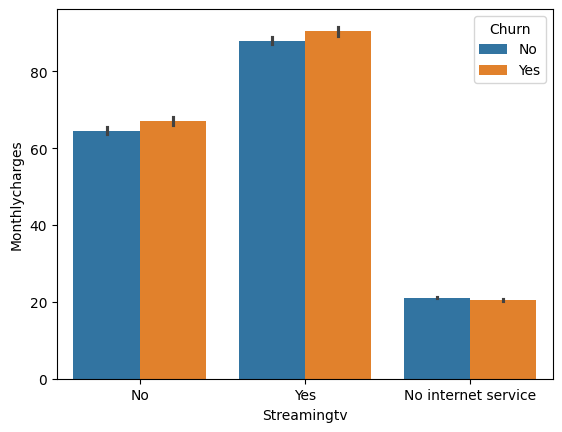

In [199]:
sns.barplot(data = df, x = 'Streamingtv', y = 'Monthlycharges', hue = 'Churn')

<Axes: xlabel='Streamingmovies', ylabel='Monthlycharges'>

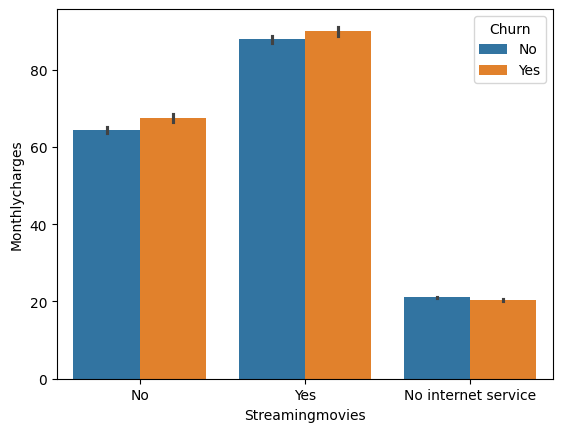

In [200]:
sns.barplot(data = df, x = 'Streamingmovies', y = 'Monthlycharges', hue = 'Churn')

<Axes: xlabel='Deviceprotection', ylabel='Monthlycharges'>

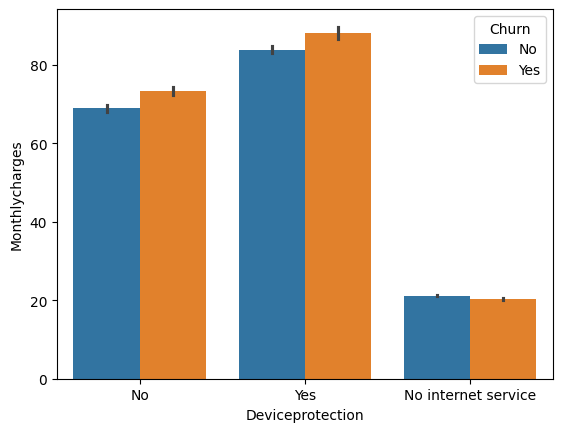

In [201]:
sns.barplot(data = df, x = 'Deviceprotection', y = 'Monthlycharges', hue = 'Churn')

##### In order to check the relationship between multiple variables, we need the dataset to be in numeric values.

  - Split the data into training and testing dataset.
  - Fit the encoder on the train dataset.
  - Transform on both training and testing dataset.

In [202]:
df['Totalcharges'] = df['Totalcharges'].astype('float')

In [203]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = "Churn")
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 32)

In [204]:
#### Encoding the output column using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [212]:
X_train.head().iloc[1].values

array(['Male', np.int64(0), 'No', 'No', np.int64(1), 'Yes', 'No', 'DSL',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Month-to-month', 'Yes',
       'Electronic check', np.float64(53.95), np.float64(53.95)],
      dtype=object)

In [211]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining the order of all the Ordinal columns.
categoriesDict = {
    'Contract' : ['Month-to-month', 'One year', 'Two year'],
}

ordinalColumns = ['Contract']
binaryOheColumns = ['Gender', 'Partner', 'Dependents', 'Phoneservice', 'Paperlessbilling']
multiNominalOheCols = ['Multiplelines', 'Onlinesecurity', 'Onlinebackup', 'Deviceprotection',
                     'Techsupport', 'Streamingtv', 'Streamingmovies', 'Paymentmethod', 'Internetservice']

# Preparing the categories for passing the order.
categories = [value for column, value in categoriesDict.items()]

# Creating the objects of the encoders
oe = OrdinalEncoder(categories = categories,  dtype='int8')
binaryOhe = OneHotEncoder(drop = 'first',  dtype='int8')
multiOhe = OneHotEncoder(drop = 'first',  dtype='int8')

# Creating the column transformer
columnTransformer = ColumnTransformer(
    transformers = [
        ('ordinalEncoding', oe, ordinalColumns),
        ('binaryOneHotEncoding', binaryOhe, binaryOheColumns),
        ('multiOneHotEncoding', multiOhe, multiNominalOheCols),
      ],
    remainder = 'passthrough'
    )

In [ ]:
# Encoding the Training and testing sets.
X_train_encoded = columnTransformer.fit_transform(X_train)
X_test_encoded = columnTransformer.transform(X_test)

In [ ]:
# Creating DataFrames from the numpy array
X_train_encoded = pd.DataFrame(X_train_encoded, columns = columnTransformer.get_feature_names_out())
X_test_encoded = pd.DataFrame(X_test_encoded, columns = columnTransformer.get_feature_names_out())

#### Checking for Multicollinearity

  Summary:

  - There are a lot of columns which are related to each other, Some of them are perfectly multi collinear.
  - Multicollinearity leads to :
    - Large standard errors for coefficients.
    - Coefficients that change dramatically with small data changes.
    - Unreliable statistical significance tests.

  - Perfect Multicollinearity prevents solution:
    - It makes the matrix singular -> Non invertible. So you cannot calculate the coefficients.

In [ ]:
plt.figure(figsize = (10, 5))
sns.heatmap(X_train_encoded.corr())
plt.show()

In [ ]:
correaltionMatrix = X_train_encoded.corr()

multicollinearColumns = set()

for i in range(len(correaltionMatrix)):

  for j in range(i + 1, len(correaltionMatrix.iloc[0, :])):

    if i == j:
      continue

    correaltion = correaltionMatrix.iloc[i, j]

    if abs(correaltion) > 0.8:
      multicollinearColumns.add(correaltionMatrix.iloc[i].name)
      multicollinearColumns.add(correaltionMatrix.iloc[j].name)

In [ ]:
# Selected these columns by analyzing the multicollinearColumns
columnsToRemove = ['multiOneHotEncoding__Onlinesecurity_No internet service', 'multiOneHotEncoding__Streamingmovies_No internet service', 'multiOneHotEncoding__Techsupport_No internet service',
                   'multiOneHotEncoding__Streamingtv_No internet service', 'multiOneHotEncoding__Onlinebackup_No internet service', 'multiOneHotEncoding__Internetservice_No',
                   'remainder__Totalcharges']

In [ ]:
X_train_new = X_train_encoded.drop(columns = columnsToRemove)
X_test_new = X_test_encoded.drop(columns = columnsToRemove)

In [ ]:
sns.heatmap(X_train_new.corr())
plt.title("After Removing Multicollinear Columns")
plt.show()

##### Using Variance Inflation Factor to find out Multicollienarity in the data :
  - The Features with VIF > 5 are treated as multicollinear features.
  - Linear Models are bad at handling multicollinear data whereas Tree or ensemble models handle multicollinear data perfectly.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

temp_df = X_train_new.copy()
temp_df = add_constant(temp_df)

In [ ]:
vif_df = pd.DataFrame()

vif_df['Feature'] = temp_df.columns

# Skipping the constant column
vif_df['VIF'] = [variance_inflation_factor(temp_df.values, i) for i in range(temp_df.shape[1])]

In [ ]:
vif_df = vif_df.sort_values('VIF', ascending=False)
vif_df

In [ ]:
# Selecting all the features with > 7 VIF score
multicollinearColumns = list(vif_df[vif_df['VIF'] > 7]['Feature'].values)

#### Important

- I'm from the future and I want to say that we are not going to use the following X_train_new and X_test_new because the models are performing better when we include the multicollinear columns in the dataset instead of removing them.

In [ ]:
# Not using them as having all the columns in the dataset is producing better results.
X_train_new = X_train_new.drop(columns = multicollinearColumns)
X_test_new = X_test_new.drop(columns = multicollinearColumns)

#### Testing Undersampling vs Oversampling.

##### Importing Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

##### Undersampling : Not performing well

In [ ]:
# When undersampled => The Number of Minority class samples = No of Majority Class samples.
# The majority class samples are made equal to the minority class samples.

sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2)


accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []


for train_index, validation_index in sss.split(X_train_encoded, y_train):

  training_X = X_train_encoded.loc[train_index]
  validation_X = X_train_encoded.loc[validation_index]

  training_y = y_train[train_index]
  validation_y = y_train[validation_index]


  nm = NearMiss(sampling_strategy='majority', version = 1)

  resampled_training_X, resampled_training_y = nm.fit_resample(training_X, training_y)

  rf = RandomForestClassifier()

  rf.fit(resampled_training_X, resampled_training_y)

  predictions = rf.predict(validation_X)

  accuracy_scores.append(accuracy_score(validation_y, predictions))
  precision_scores.append(precision_score(validation_y, predictions))
  recall_scores.append(recall_score(validation_y, predictions))
  f1_scores.append(f1_score(validation_y, predictions))
  roc_auc_scores.append(roc_auc_score(validation_y, predictions))


print(f'The average Accuracy score : {round(np.mean(accuracy_scores), 2)}')
print(f'The average Precision score : {round(np.mean(precision_scores), 2)}')
print(f'The average Recall score : {round(np.mean(recall_scores), 2)}')
print(f'The average F1 score : {round(np.mean(f1_scores), 2)}')
print(f'The average ROC AUC score : {round(np.mean(roc_auc_scores), 2)}')

##### OverSampling : Performing Better than Undersampling


In [ ]:
# When undersampled => The Number of Minority class samples = No of Majority Class samples.
# The minority class samples are made equal to the majority class samples.

sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2)


accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []


for train_index, validation_index in sss.split(X_train_encoded, y_train):

  training_X = X_train_encoded.loc[train_index]
  validation_X = X_train_encoded.loc[validation_index]

  training_y = y_train[train_index]
  validation_y = y_train[validation_index]


  smote = SMOTE(sampling_strategy='minority')

  resampled_training_X, resampled_training_y = smote.fit_resample(training_X, training_y)

  rf = RandomForestClassifier()

  rf.fit(resampled_training_X, resampled_training_y)

  predictions = rf.predict(validation_X)

  accuracy_scores.append(accuracy_score(validation_y, predictions))
  precision_scores.append(precision_score(validation_y, predictions))
  recall_scores.append(recall_score(validation_y, predictions))
  f1_scores.append(f1_score(validation_y, predictions))
  roc_auc_scores.append(roc_auc_score(validation_y, predictions))


print(f'The average Accuracy score : {round(np.mean(accuracy_scores), 2)}')
print(f'The average Precision score : {round(np.mean(precision_scores), 2)}')
print(f'The average Recall score : {round(np.mean(recall_scores), 2)}')
print(f'The average F1 score : {round(np.mean(f1_scores), 2)}')
print(f'The average ROC AUC score : {round(np.mean(roc_auc_scores), 2)}')

#### Finding the Best Model

  - Since we got to know that Oversampling is working better, we will use oversampling and train multiple models and see which model works better.

In [ ]:

results = []

def modelComparison(model_name, model, cv_splits = 5, test_size = 0.2, random_state = 42):

  sss = StratifiedShuffleSplit(n_splits = cv_splits, test_size = test_size, random_state=random_state)

  accuracy_scores = []
  precision_scores = []
  recall_scores = []
  f1_scores = []
  roc_auc_scores = []


  for train_index, validation_index in sss.split(X_train_encoded, y_train):

    training_X = X_train_encoded.loc[train_index]
    validation_X = X_train_encoded.loc[validation_index]

    training_y = y_train[train_index]
    validation_y = y_train[validation_index]


    smote = SMOTE(sampling_strategy='minority')

    resampled_training_X, resampled_training_y = smote.fit_resample(training_X, training_y)


    model.fit(resampled_training_X, resampled_training_y)

    predictions = model.predict(validation_X)

    # We need predict_proba to find out the ROC AUC scores.
    pred_proba = model.predict_proba(validation_X)[:, 1] if hasattr(model, 'predict_proba') else predictions

    accuracy_scores.append(accuracy_score(validation_y, predictions))
    precision_scores.append(precision_score(validation_y, predictions))
    recall_scores.append(recall_score(validation_y, predictions))
    f1_scores.append(f1_score(validation_y, predictions))

    try:
        roc_auc_scores.append(roc_auc_score(validation_y, pred_proba))
    except:
        roc_auc_scores.append(roc_auc_score(validation_y, predictions))

  results.append({
          'Model': model_name,
          'Accuracy_Mean': np.mean(accuracy_scores),
          'Precision_Mean': np.mean(precision_scores),
          'Recall_Mean': np.mean(recall_scores),
          'F1_Mean': np.mean(f1_scores),
          'ROC_AUC_Mean': np.mean(roc_auc_scores),
      })


In [ ]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [ ]:
for model_name, model in models.items():
  modelComparison(model_name, model, 5, 0.2, 42)

In [ ]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Recall_Mean', ascending=False)

##### Business Implications:

  - In the folliowing dataframe, some models are good at precision and some are good at recall, which one to choose.

  - Choose High recall models when:
    - Cost of missing a churner is high.
    - You can handle false alarms (retention campaigns are cheap).
    - Better to contact 100 customers to save 80 actual churners.


  - Choose High precision models when:
    - Retention campaigns are expensive => False positives are expensive.
    - You only want to target customers who are very likely to churn.

##### Prioritize recall over precision:

  - Why recall is more important for churn than precision:

    - The cost of loosing a customer is higher than a false alarm.
    - If you miss a customer who's about to churn (false negative), you loose that customer entirely, potentially forever.
    - If you incorrectly flag a loyal customer as likely to churn(false positive), you might give them an additional discount but the customer would be staying anyway.


  - Revenue Impact analysis:

    - Missing a churner : You lose their entire lifetime value (could be hundred to thousands of dollars).
    - False positive : You may spend additional $10 - $30 on a retention campaign for someone who wasn't going to leave.



  - Practical Business perspective:

    - Most companies would rather:
      - Send retention offers to 100 customers where only 40 were actually going to churn.
      - Then miss 30 customers who were definitely going to churn.


      

In [ ]:
results_df

##### Summary of results:

  - The Simplicity winner: The Logistic Regression model is outperforming all the complex ensemble models. This suggests that the underlying patterns in the dataset are linearly separable, making the additional complexity less beneficial.

  - Precision Recall Tradeoff : There is clear inverse relationship between precision and recall across models. Naive Bayes has highest recall (0.869) and lowest precision (0.42), while random forest has high precision (0.62) and lowest recall(0.49).

  

#### Hyperparameter Tuning

  - Should we perform Hyperparameter tuning or Threshold tuning first ?
    - The optimal threshold for default parameters might be suboptimal for tuned parameters.

  

In [ ]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline



X_train, X_validation, y_train, y_validation = train_test_split(X_train_encoded, y_train, test_size = 0.2, random_state = 42)

pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='minority', random_state = 42)),
    ('classifier', LogisticRegression(random_state = 42, max_iter = 1000))
])


# Define parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__solver': ['liblinear', 'saga'],  # Compatible with l1/l2
    'classifier__class_weight': [None, 'balanced']  # Handle class imbalance
}

grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring = 'recall', n_jobs = -1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import precision_recall_curve


predict_probabilities = best_model.predict_proba(X_validation)


precisions, recalls, thresholds = precision_recall_curve(y_validation, predict_probabilities[:, 1])

In [ ]:
sns.lineplot(x = recalls, y = precisions, color = 'red')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")
plt.show()

In [ ]:
target_recall = 0.8
recall_diff = np.abs(recalls - target_recall)

In [ ]:
# Find the index closest to 0.8 recall
target_recall = 0.8
recall_diff = np.abs(recalls - target_recall)
best_idx = np.argmin(recall_diff)
optimal_threshold = thresholds[best_idx]

print(f"Threshold for ~80% recall: {optimal_threshold:.3f}")
print(f"Actual recall: {recalls[best_idx]:.3f}")
print(f"Precision at this point: {precisions[best_idx]:.3f}")

#### Actual Testing of the final model

In [ ]:
probabilities = best_model.predict_proba(X_test_encoded)[:, 1]

optimal_threshold = 0.549

predictions = (probabilities >= optimal_threshold).astype(int)

#### Evaluate Final Performance

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Check how well it performs
print("Final Model Performance:")
print(classification_report(y_test, predictions))


In [ ]:
print("\nConfusion Matrix:")
confusion_matrix(y_test, predictions)

#### Saving the model for deploying

In [ ]:
import joblib
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('preprocessing', columnTransformer),
    ('model', best_model)
])

joblib.dump(pipeline, 'pipeline.pkl')
